In [1]:
# Import Modules #
import os, sys, importlib
import numpy as np
import pandas as pd
from sklearn.ensemble import RandomForestClassifier
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
import sys
sys.path.append('../')
import more_metrics


# Load Example Data

In [2]:
data = load_breast_cancer()

In [3]:
df = pd.DataFrame(data=data['data'],columns=data['feature_names'])
df['label']=data['target']
x_train, x_test, y_train, y_test = train_test_split(df.iloc[:,:-1], df.iloc[:,-1], test_size=0.40, random_state=123)

## Excluding features for the reference model just for the example

In [4]:
ref_feat, new_feat, bla = [],[], []
for i in data['feature_names']:
    if 'fractal' in i or 'smoothness' in i or 'texture' in i or 'concave' in i or 'compactness' in i:
        ref_feat+=[i]
    else:
        bla+=[i]
    new_feat+=[i]
len(ref_feat),len(new_feat)

(15, 30)

# Model

In [5]:
ref_model = RandomForestClassifier()#max_depth=5, n_estimators=100, verbose=1,random_state=0)
new_model = RandomForestClassifier()#max_depth=5, n_estimators=100, verbose=1,random_state=0)
ref_model.fit(x_train[ref_feat], y_train)
new_model.fit(x_train[new_feat], y_train)

RandomForestClassifier()

In [6]:
test_ref_pred=ref_model.predict_proba(x_test[ref_feat])
test_new_pred=new_model.predict_proba(x_test[new_feat])

# Area Under the Curve with CI

Reference AUC: 0.9898944805194805
New AUC: 0.9948457792207792


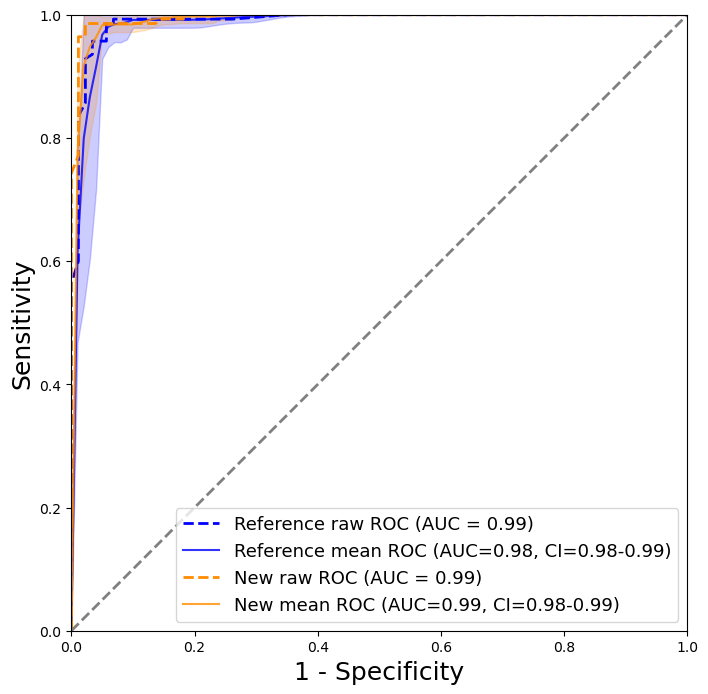

In [7]:
bs = 10
more_metrics.plot_comparing_aucs(y_test.values,test_ref_pred[:,1],test_new_pred[:,1],n_bootstraps=bs)

# Net Reclassification Index 

In [8]:
print(more_metrics.category_free_nri(y_test.values,test_ref_pred[:,1],test_new_pred[:,1]))

(0.5928571428571429, 0.5795454545454546, 1.1724025974025976)


In [9]:
print(more_metrics.calculate_nri(y_test.values,test_ref_pred[:,1],test_new_pred[:,1],  [0.02,0.1,0.5,0.95]))

(0.17857142857142855, 0.3295454545454546, 0.5081168831168832)


# IDI Curve

In [10]:
label_dict = {2:'BI-RADS 3/4a Border (2%)',10:'BI-RADS 4a/4b Border (10%)',50:'BI-RADS 4b/4c Border (50%)',95:'BI-RADS 4c/5 Border (95%)'}
idi_out = more_metrics.plot_idi(y_test.values,test_ref_pred[:,1],test_new_pred[:,1], label_dict, bs, show=False)

In [11]:
#t[-1].savefig('../idi_curve2.png', dpi=300, bbox_inches='tight')

## New functions allow for different number of theresholds

### Example of only looking at the BI-RADS 3 and 4 threshold

In [12]:
print(more_metrics.calculate_nri(y_test.values,test_ref_pred[:,1],test_new_pred[:,1],  [0.02]))

AttributeError: module 'more_metrics' has no attribute 'nri'

In [ ]:
more_metrics.plot_idi(y_test.values,test_ref_pred[:,1],test_new_pred[:,1],{2:'Only the BI-RADS 3/4a Border (2%)',})

In [ ]:
sys.exit(0)